In [285]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV ,KFold
import pandas as pd
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler

In [286]:
df = pd.read_csv('Data/colon-dataset-processed.csv')
df

,Class,Age,p16540_C/C,p16540_G/C,p16540_G/G,p16580_C/C,p16580_C/T,p16580_T/T,mdm2_G/G,mdm2_G/T,mdm2_T/T,GAL3_A/A,GAL3_C/A,GAL3_C/C,TIM1_C/C,TIM1_G/C,TIM1_G/G
0,healthy,49,False,True,False,True,False,False,True,False,False,False,True,False,False,True,False
1,healthy,49,False,True,False,True,False,False,True,False,False,True,False,False,False,True,False
2,healthy,49,False,True,False,True,False,False,False,True,False,False,True,False,True,False,False
3,healthy,36,False,True,False,True,False,False,False,False,True,False,True,False,True,False,False
4,healthy,49,True,False,False,False,True,False,False,False,True,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,diagnosed,81,False,True,False,True,False,False,False,False,True,False,False,True,False,False,True
111,diagnosed,73,True,False,False,True,False,False,False,False,True,False,False,True,False,False,True
112,diagnosed,56,True,False,False,True,False,False,False,True,False,False,False,True,False,True,False
113,diagnosed,74,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True


In [287]:
data=df.drop(['Class'],axis=1)
target=df['Class']
print('Original dataset distribution %s' % Counter(target))
random_state=123

Original dataset distribution Counter({'diagnosed': 65, 'healthy': 50})


# Oreginal Data

In [288]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.3,random_state=random_state)
logreg.fit(X_train, y_train)
y_pred_Org= logreg.predict(X_test)
print("Accuracy: %.2f%%" % (logreg.score(X_test, y_test) * 100.0))

Accuracy: 82.86%


/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

   diagnosed       0.83      0.83      0.83        18
     healthy       0.82      0.82      0.82        17

    accuracy                           0.83        35
   macro avg       0.83      0.83      0.83        35
weighted avg       0.83      0.83      0.83        35



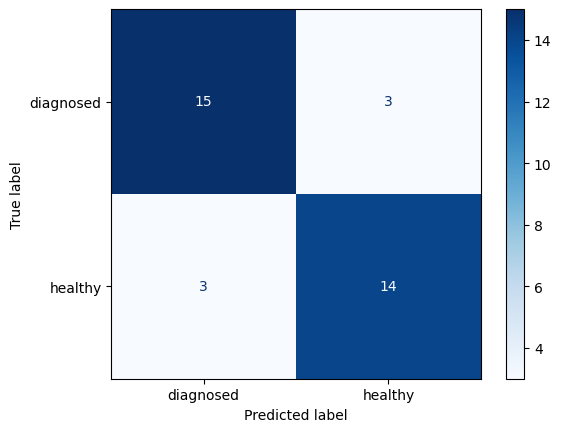

In [289]:
print(classification_report(y_test, y_pred_Org))
cm=confusion_matrix(y_test, y_pred_Org)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [290]:
# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logreg, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 600 candidates, totalling 2400 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, max_iter=100, penalty

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[C

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depreca

[CV] END ..C=0.001, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=0.001, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s[CV] END C=0.001, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.1s

[CV] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=0.001, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, m

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END C=0.001, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=0.001, max_iter=300, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=0.001, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.001, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.001, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=0.001, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END ....C=0.001, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s

[CV] END ......C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.001, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.001, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.001, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.001, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, max_ite

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt

[CV] END .....C=0.001, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.001, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.001, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.01, m

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END .C=0.01, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...C=0.001, max_iter=400, penalty=none, solver=saga; total time=   0.1s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=0.01, max

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END C=0.01, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.01, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.01, max_iter=200, penalty=l2, solver=lbfgs; total time=   0

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END .....C=0.01, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.01, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.01, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.01, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=0.01, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.01, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=0.01, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.01, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.01, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=0.1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.1s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=0.1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=500, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .......C=0.1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.01, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=0.1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt

[CV] END C=0.1, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.1, max_iter=400, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ........C=0.1, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ......C=0.1, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END .........C=1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..........C=1, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END .....C=0.1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .........C=1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureW

[CV] END C=1, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ..........C=1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..........C=1, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..........C=1, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=1, max_iter

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the p

[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, max_iter=400, penalty=l2, solver=sag; total time=   0.1s
[CV] END .........C=1, max_iter=400, penalty=l1, solver=saga; total time=   0.1s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ..........C=1, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=5

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been dep

[CV] END ..C=1, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=1, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=1, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=1, max_iter=500, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ...

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.p

[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=100,

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-

[CV] END C=10, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END ........C=10, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s

[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ...C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=none, solver=sag; total time=   0.2s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=10, max_ite

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.2s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.2s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.1s
[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.2s
[CV] END ...C=10, max_iter=5

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/h

[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.1s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV]

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which me

[CV] END .......C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=10, max_iter=400, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=10, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .....C=10, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=1

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=400, penalty=none, solver=saga; total time=   0.1s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.1s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=10, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=10, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureW

[CV] END ...C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=100, max_iter=100, penalty=none, solver=saga; total time=   0.0s

[CV] END C=100, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=100, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .......C=100, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END .......C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=100, max_iter=400, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.1s
[CV] END C=100, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=100, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=100, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/h

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [291]:
# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_OrgGr = grid_search.predict(X_test)
print("Accuracy with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'C': 0.001, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 86.25% 
Accuracy with Grid search: 80.00%


              precision    recall  f1-score   support

   diagnosed       0.79      0.83      0.81        18
     healthy       0.81      0.76      0.79        17

    accuracy                           0.80        35
   macro avg       0.80      0.80      0.80        35
weighted avg       0.80      0.80      0.80        35



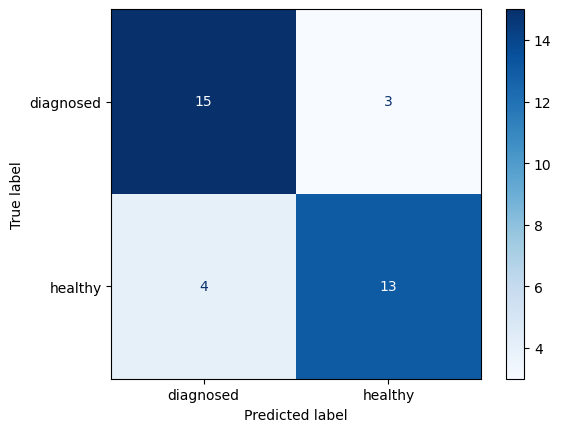

In [292]:

print(classification_report(y_test, y_pred_OrgGr))
cm=confusion_matrix(y_test, y_pred_OrgGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Oversampled

In [293]:
sm = SMOTE(random_state = 2)
X_train_res, y_train_res = sm.fit_resample(data, target)
X_train, X_test, y_train, y_test = train_test_split(X_train_res, y_train_res, test_size = 0.3,random_state=random_state)
print('Original dataset distribution %s' % Counter(y_train_res))
logreg_smote = LogisticRegression()
logreg_smote.fit(X_train, y_train)
y_pred_SMOTE= logreg_smote.predict(X_test)
print("Accuracy of SMOTE data: %.2f%%" % (logreg_smote.score(X_test, y_test) * 100.0))

Original dataset distribution Counter({'healthy': 65, 'diagnosed': 65})
Accuracy of SMOTE data: 79.49%


              precision    recall  f1-score   support

   diagnosed       0.79      0.69      0.73        16
     healthy       0.80      0.87      0.83        23

    accuracy                           0.79        39
   macro avg       0.79      0.78      0.78        39
weighted avg       0.79      0.79      0.79        39



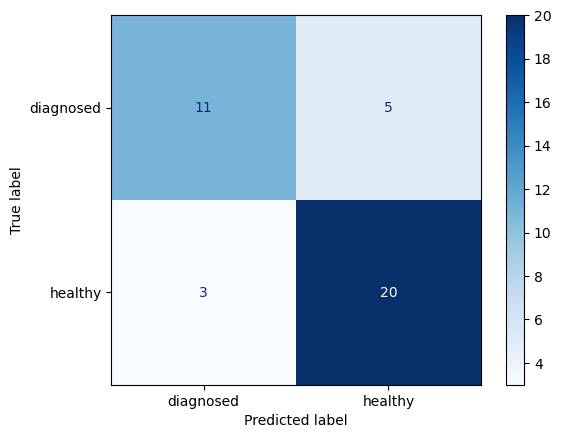

In [294]:

print(classification_report(y_test, y_pred_SMOTE))
cm=confusion_matrix(y_test, y_pred_SMOTE)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [295]:

# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logreg_smote, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



Fitting 4 folds for each of 600 candidates, totalling 2400 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, s

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END C=0.001, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.001, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=0.001, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=0.001, max_iter=200, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.001, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/h

[CV] END C=0.001, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.001, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .....C=0.001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.001, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.001, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..C=0.001, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.001, ma

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will igno

[CV] END ....C=0.001, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.001, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=0.001, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.001, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depreca

[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=0.01, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.1s
[CV] END ......C=0.01, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l2, solver=saga; total time=   0.1s
[CV] END ..C=0.001, max_iter=500, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END C=0.001, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, m

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.01, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=200, penalty=l1, solver=saga; total time=   0.1s
[CV] END C=0.01, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.01, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ...C=0.01, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .......C=0.01, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .......C=0.1, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ...C=0.01, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ......C=0.01, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END ....C=0.01, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, ma

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END ........C=0.1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END .....C=0.01, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END .......C=0.1, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=0.01, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.01, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=0.1, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-


[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.01, max_iter=400, penalty=none, solver=saga; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=0.1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

[CV] END C=0.1, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=0.1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=0.1, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END .......C=0.1, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END C=0.1, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=0.1, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=400, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=0.1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .........C=1, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END C=0.1, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ........C=0.1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=1, max_iter=100, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ........C=0.1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-

[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=0.1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.1, max_iter=500, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] E

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .........C=1, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ......C=1, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.1s
[CV] END .........C=1, max_iter=400, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=2

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/h

[CV] END ......C=1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .........C=1, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, max_iter=200, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=1, ma

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END ......C=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END .........C=1, max_iter=500, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=10, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=1, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.p

[CV] END ........C=10, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=10, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ........C=10, max_iter=200, penalty=l2, solver=saga; total time=   0.1s
[CV] END ........C=1, max_iter=400, penalty=none, solver=sag; total time=   0.1s
[CV] END ..C=1, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=500

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-

[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=500, penalty=none, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.0s[CV] END ........C=1, max_iter=500, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s

[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .........C=10, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: Converge

[CV] END ...C=10, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=10, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ........C=10, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=10, max_ite

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/h

[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END .....C=10, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ...C=10, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .C=10, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ...C=10, max_iter=300, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=3

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END .C=10, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=10, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .......C=10, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=10, max_iter=400, penalty=none, solver=saga; total time=   0.1s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=10, max

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=none, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=500, penalty=l2, solver=sag; total time=   0.1s
[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=10, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-pa

[CV] END C=100, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=100, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ......C=1

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-

[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.2s
[CV] END ........C=100, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s

[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=4

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=200, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=none, solver=sag; total time=   0.1s
[CV] END .....C=100, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=100, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=none, solver=sag; total time=   0.1s
[CV] END ......C=100, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END ....C=100, 

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.1s[CV] END ......C=100, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.1s

[CV] END ........C=100, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END C=100, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END C=100, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=500, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=100, max_iter=500, penalty=none, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=500, penalty=none, solver=sag; total time=   0.1s
[CV] END ....C=100, max_iter=500, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END ......C=100, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.2s
[CV] END ....C=100, max_iter=500, penalty=none, solver=lbfgs; total time=   0.2s
[CV] END ......C=100, max_iter=500, penalty=none, solver=sag; total time=   0.1s
[CV] END ..C=100, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depreca

GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [296]:

# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_SMOTEGr = grid_search.predict(X_test)
print("Accuracy of SMOTE data with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))

Best parameters found: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 86.86% 
Accuracy of SMOTE data with Grid search: 76.92%


              precision    recall  f1-score   support

   diagnosed       0.71      0.75      0.73        16
     healthy       0.82      0.78      0.80        23

    accuracy                           0.77        39
   macro avg       0.76      0.77      0.76        39
weighted avg       0.77      0.77      0.77        39



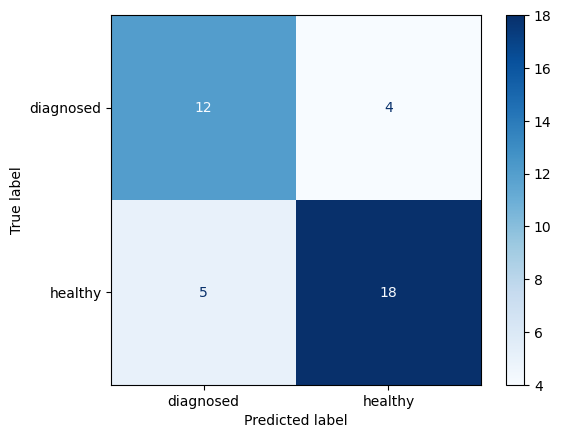

In [297]:
print(classification_report(y_test, y_pred_SMOTEGr))
cm=confusion_matrix(y_test, y_pred_SMOTEGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Undersampling

In [298]:
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(data, target)
print('Original dataset distribution %s' % Counter(y_res))
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.3,random_state=random_state)

logreg_underSampler = LogisticRegression()
logreg_underSampler.fit(X_train, y_train)
y_pred_underSampler= logreg_underSampler.predict(X_test)
print("Accuracy of SMOTE data: %.2f%%" % (logreg_underSampler.score(X_test, y_test) * 100.0))


Original dataset distribution Counter({'diagnosed': 50, 'healthy': 50})
Accuracy of SMOTE data: 83.33%


              precision    recall  f1-score   support

   diagnosed       0.81      0.87      0.84        15
     healthy       0.86      0.80      0.83        15

    accuracy                           0.83        30
   macro avg       0.83      0.83      0.83        30
weighted avg       0.83      0.83      0.83        30



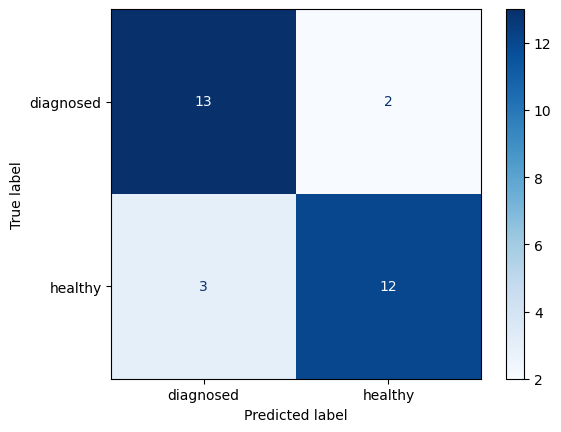

In [299]:
print(classification_report(y_test, y_pred_underSampler))
cm=confusion_matrix(y_test, y_pred_underSampler)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [300]:
# Define the hyperparameters and their possible values
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Use GridSearchCV to search for the best hyperparameters
grid_search = GridSearchCV(logreg_underSampler, param_grid, cv=KFold(n_splits=4, random_state=0, shuffle=True), scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


Fitting 4 folds for each of 600 candidates, totalling 2400 fits
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ......C=0.001, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=0.001, max_iter=100, penalty=l1, s

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END ......C=0.001, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=0.001, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=200, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END ......C=0.001, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=200, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=0.001, max_iter=300, penalty=elasticnet, solver=newton-cg; total tim

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END ...C=0.001, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=0.001, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.001, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..C=0.001, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .....C=0.001, max_iter=300, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=0.001, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.001, m

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END ....C=0.001, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.001, max_iter=400, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.001, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ..C=0.001, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=100, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.001, max_iter=500, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END .......C=0.01, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=300, penalty=l1, solver=sag; total time=   0.0s
[CV] END .......C=0.01, max_iter=300, penalty=l2, solver=sag; total time=   0.1s
[CV] END ...C=0.001, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=0.01, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ...C=0.001, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_iter=300, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=200, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .....C=0.01, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END ...C=0.01, max_ite

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depreca

[CV] END .C=0.01, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .....C=0.01, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.01, max_iter=300, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .C=0.01, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_iter=400, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .....C=0.01, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_iter=200, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.01, max_iter=300, penalty=none, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ......C=0.01, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=0.01, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=0.01, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.01, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .......C=0.01, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=0.1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END .......C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END C=0.1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ....C=0.01, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .....C=0.01, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=0.01, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=0.1, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=0.01, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ........C=0.1, max_iter=100, penalty=l2, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=sag; total time=   0.0s
[CV] END ....C=0.1, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END C=0.1, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV]

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/h

[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END .......C=0.1, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=0.1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter=400, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=1

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END ......C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=0.1, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END ....C=1, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ....C=0.1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ......C=0.1, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=0.1, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=0.1, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=0.1, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=0.1, max_iter

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ..........C=1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .....C=0.1, max_iter=500, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..C=1, max_iter=200, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ........C=1, max_iter=100, penalty=none, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_iter=500, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=100, penalty=none, solver=saga; total time=   0.0s
[CV] END ..C=1, max_iter=100, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END ..........C=1, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=0.1, max_i

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ....C=1, max_iter=500, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ..C=1, max_iter=300, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ..C=1, max_iter=400, penalty=none, solver=newton-cg; total time=   0.0s
[CV] END .......C=1, max_iter=200, penalty=none, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=300, penalty=none, solver=sag; total time=   0.0s
[CV] END ..C=1, max_iter=300

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached whic

[CV] END ....C=1, max_iter=400, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ....C=1, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=100, penalty=l2, solver=newton-cg; total time=   0.1s
[CV] END ........C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ........C=1, max_iter=400, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ..........C=1, max_iter=400, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..........C=1, max_iter=500, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=1, max_iter=500, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ....C=1, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ...C=10, max_iter=1

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been depre

[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END ........C=1, max_iter=500, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .......C=10, max_iter=100, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=10, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=1, max_iter=500, penalty=elasticnet, solver=saga; total time=   0.0s
[CV] END .........C=10, max_iter=200, penalty=l2, solver=sag; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=100, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=100

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (

[CV] END ...C=10, max_iter=100, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=10, max_iter=100, penalty=l2, solver=saga; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .C=10, max_iter=200, penalty=none, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=100, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which me

[CV] END .......C=10, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s

[CV] END ...C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END .....C=10, max_iter=300, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END C=10, max_iter=500, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ...C=10, max_iter=300, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=10, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END ........C=10, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END .....C=10, max_iter=400, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END .C=

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END ...C=10, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.1s[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s

[CV] END .C=10, max_iter=400, penalty=none, solver=newton-cg; total time=   0.1s
[CV] END ......C=10, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=400, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ........C=100, max_iter=100, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ......C=10, max_iter=400, penalty=none, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=100, penalty=l1, solver=saga; total time=   0.0s
[CV] END ......C=10, max_ite

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which me


[CV] END .........C=10, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END .........C=10, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END .........C=10, max_iter=500, penalty=l1, solver=sag; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=10, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ....C=100, max_iter=100, penalty=none, solver=lbfgs; total time=   0.0s
[CV]

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which me

[CV] END ...C=10, max_iter=400, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l1, solver=newton-cg; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l1, solver=lbfgs; total time=   0.0s
[CV] END .......C=100, max_iter=200, penalty=l1, solver=saga; total time=   0.0s
[CV] END .......C=10, max_iter=500, penalty=none, solver=sag; total time=   0.1s
[CV] END .......C=10, max_it

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the pas

[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=200, penalty=l1, solver=sag; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ........C=100, max_iter=200, penalty=l1, solver=sag; total time=   0.0s[CV] END ....C=100, max_iter=200, penalty=none, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=100, max_iter=400, penalty=l1, solver=saga; total time=   0.0s
[CV] END ........C=100, max_iter=300, penalty=l2, solver=sag; total time=   0.0s
[CV] END ....C=100, max_iter=300, penalty=none, solver=lbfgs; total time=   0.1s
[CV] END ..C=100, max_iter=300, penalty=l2, solver=newton-cg; total time=   0.0s

[CV] END ........C=100, max_

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/h

[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ......C=100, max_iter=200, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END ..C=100, max_iter=200, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=liblinear; total time=   0.0s
[CV] END ......C=100, max_iter=300, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END C=100, max_iter=300, penalty=elasticnet, solver=liblinear; total tim

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore

[CV] END ..C=100, max_iter=400, penalty=l1, solver=liblinear; total time=   0.0s
[CV] END ........C=100, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END ........C=100, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ........C=100, max_iter=400, penalty=l1, solver=sag; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=100, max_iter=500, penalty=l1, solver=saga; total time=   0.0s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=newton-cg; total time=   0.0s
[CV] END .......C=100, max_iter=500, penalty=l1, solver=saga; total time=   0.1s
[CV] END ..C=100, max_iter=500, penalty=l2, solver=liblinear; total time=   0.0s
[CV] END ..C=100, max_iter=5

/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.10/site-packages/sklearn

[CV] END .......C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END .......C=100, max_iter=400, penalty=l2, solver=saga; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=newton-cg; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s
[CV] END C=100, max_iter=400, penalty=elasticnet, solver=lbfgs; total time=   0.0s


GridSearchCV(cv=KFold(n_splits=4, random_state=0, shuffle=True),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300, 400, 500],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=2)

In [301]:
# Print the best parameters and their corresponding accuracy
print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation accuracy: %.2f%% " % (grid_search.best_score_*100.0))

# Evaluate on the test set
y_pred_underSamplerGr = grid_search.predict(X_test)
print("Accuracy of under sampleing data with Grid search: %.2f%%" % (grid_search.score(X_test, y_test) * 100.0))


Best parameters found: {'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Best cross-validation accuracy: 82.92% 
Accuracy of under sampleing data with Grid search: 90.00%


              precision    recall  f1-score   support

   diagnosed       0.88      0.93      0.90        15
     healthy       0.93      0.87      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



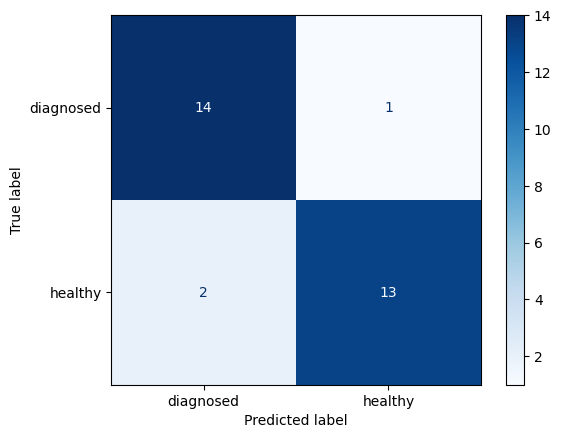

In [302]:
print(classification_report(y_test, y_pred_underSamplerGr))
cm=confusion_matrix(y_test, y_pred_underSamplerGr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=logreg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()